## Just a Simple Kidding Around My Few Knowledge In Data Science

 ------------------------------------------------------------------------------------


In [4]:
#!/bin/bash/python3

# python packages necessary to this analysis also specified in requeriments.txt 
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,timedelta
from GoogleNews import GoogleNews
from newspaper import Article

#### IBOV Daily Variation

In [5]:
YEARS_RANGE=3
end_date = date.today().strftime('%m-%d-%Y')
ini_date = (date.today()+timedelta(days=-365*YEARS_RANGE)).strftime('%m-%d-%Y')
bovespa = pdr.DataReader('^BVSP', data_source='yahoo', start=ini_date, end=end_date)
display(bovespa)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-21,83883.0,81576.0,83095.0,81815.000000,4242200.0,81815.000000
2018-05-22,83396.0,81613.0,81817.0,82739.000000,4785500.0,82739.000000
2018-05-23,82742.0,80867.0,82742.0,80867.000000,3875500.0,80867.000000
2018-05-24,80860.0,79027.0,80860.0,80122.000000,6182200.0,80122.000000
2018-05-25,80629.0,78622.0,80123.0,78898.000000,4650100.0,78898.000000
...,...,...,...,...,...,...
2021-05-12,122964.0,119458.0,122964.0,119710.000000,9405200.0,119710.000000
2021-05-13,121426.0,119711.0,119711.0,120706.000000,9356200.0,120706.000000
2021-05-14,122195.0,120719.0,120719.0,121881.000000,10136300.0,121881.000000


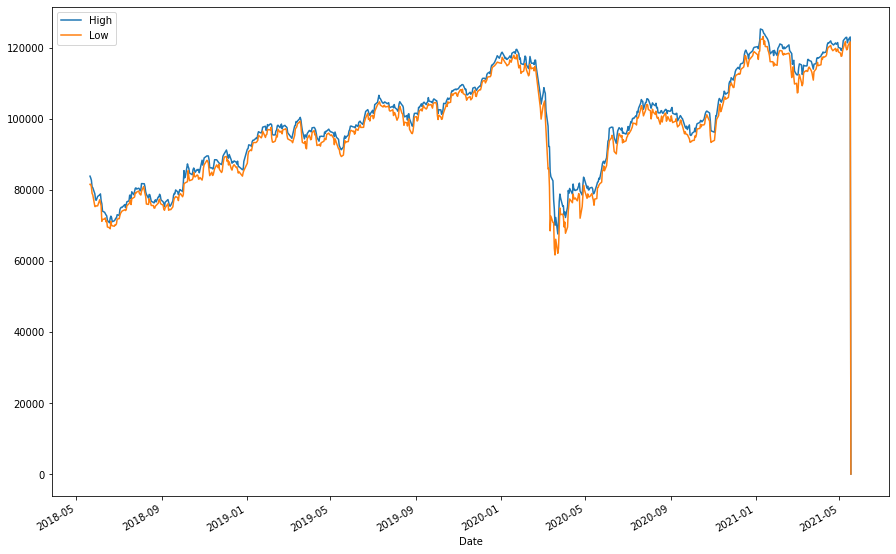

In [6]:
bovespa[['High','Low']].plot(figsize=(15,10))
plt.show()

#### Stock Variation in Mining Companies

In [8]:
mining_companies = ['AURA33','BRAP3','BRAP4','CMIN3','LTEL3B','LTLA3B','MMXM3','VALE3']
mining_market = pd.DataFrame()
for t in mining_companies:
    try:
        aux = pdr.DataReader(f'{t}.SA',data_source='yahoo',start=ini_date,end=end_date)
        mining_market[t] = aux['Adj Close']
    except:
        pass
display(mining_market)

,AURA33,BRAP3,BRAP4,CMIN3,MMXM3,VALE3
Date,,,,,,
2020-07-06,47.903725,30.489582,33.577320,NaN,1.990000,51.959354
2020-07-07,48.226692,30.489582,33.641788,NaN,1.970000,51.775658
2020-07-08,51.027607,31.013050,34.231186,NaN,1.960000,52.648228
2020-07-09,51.026985,30.755911,33.908859,NaN,1.960000,51.821583
2020-07-10,51.027607,31.472229,34.590355,NaN,1.950000,52.326756
...,...,...,...,...,...,...
2021-05-12,64.300003,64.540001,74.330002,10.04,16.900000,114.330002
2021-05-13,64.269997,62.599998,72.110001,9.87,16.100000,112.489998
2021-05-14,63.799999,61.700001,71.019997,9.54,18.049999,110.559998


#### Bellow just a treatment for NaN values and some market overview

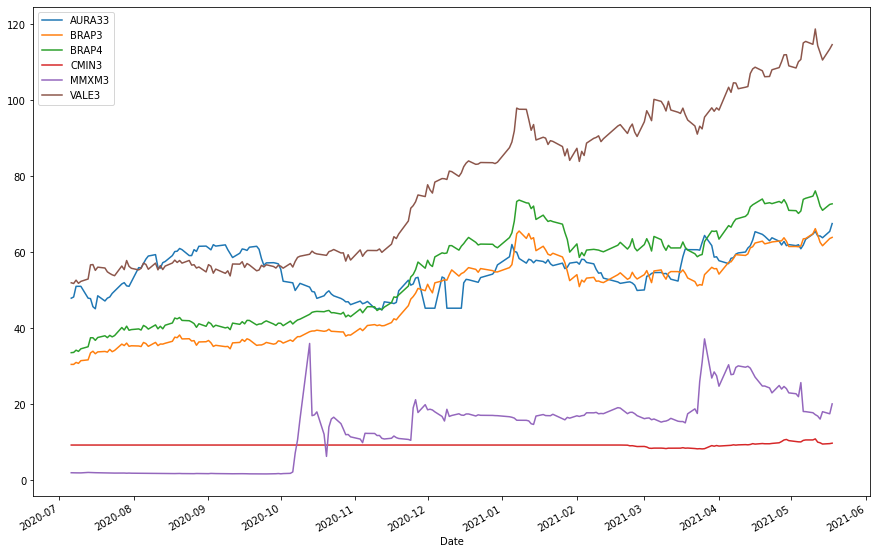

In [9]:
for idx,ticket in enumerate(mining_market):
    mining_market[ticket] = mining_market[ticket].fillna(mining_market[ticket].mean())

mining_market.plot(figsize=(15,10))
plt.show()

#### Here we'll extract the occurrence of volume outlier for contextual ticket


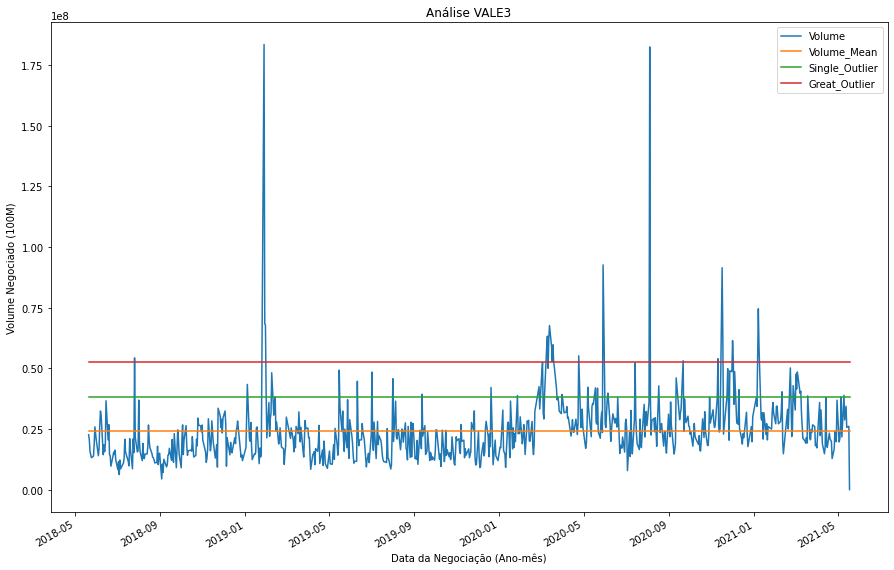

In [10]:
contextual_ticket = 'VALE3'
#loading stock data only for best player market
ticket_data = pdr.DataReader(contextual_ticket+'.SA',data_source='yahoo',start=ini_date,end=end_date)

# including our outlier line defined as the volume mean plus his standard deviation
ticket_data['Volume_Mean'] = ticket_data['Volume'].mean()
ticket_data['Single_Outlier'] = ticket_data['Volume'].mean()+ticket_data['Volume'].std()
ticket_data['Great_Outlier'] = ticket_data['Volume'].mean()+ticket_data['Volume'].std()*2

# ploting graph with labels
graph = ticket_data[['Volume','Volume_Mean','Single_Outlier','Great_Outlier']].plot(figsize=(15,10))
graph.set_xlabel('Data da Negociação (Ano-mês)')
graph.set_ylabel('Volume Negociado (100M)')
graph.set_title('Análise '+contextual_ticket) 
plt.show()

* Note on performance: I don't know exactly what the weight of memory and/or when we will need to think about it, but the number 'Volume_Outiliers' has been included above just to plot on the graph and give us a good view around the outliers that let's fetch below. I you are working with a large and slow dataframe think about save static number in one single variable instead put them repetly in the matrix. 

In [13]:
# just a example of column droping
try:
    ticket_data.drop(labels='Volume_Mean', axis='columns', inplace=True)
    ticket_data.drop(labels='Single_Outlier', axis='columns', inplace=True)
    ticket_data.drop(labels='Great_Outlier', axis='columns', inplace=True)
except:
    pass

# and working with one single variable
volume_outlier = ticket_data['Volume'].mean()+ticket_data['Volume'].std()

# extracting outilier key moments
#volume_outlier_moments = ticket_data.loc[ticket_data['Volume']>great_outlier].copy()
volume_outlier_moments = ticket_data.loc[ticket_data['Volume']>volume_outlier].copy(['Open','Close','Volume'])
print('\nDatas em que ouveram uma variação anormal nas ações da {}:\n\n{}'.format(contextual_ticket,volume_outlier_moments.index))



Datas em que ouveram uma variação anormal nas ações da VALE3:

DatetimeIndex(['2018-07-26', '2019-01-04', '2019-01-28', '2019-01-29',
               '2019-01-30', '2019-01-31', '2019-02-08', '2019-05-16',
               '2019-06-11', '2019-07-02', '2019-08-01', '2019-09-12',
               '2019-12-20', '2020-01-27', '2020-02-27', '2020-03-02',
               '2020-03-03', '2020-03-06', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-23', '2020-03-31', '2020-04-24', '2020-05-07',
               '2020-05-18', '2020-05-21', '2020-05-29', '2020-06-05',
               '2020-07-14', '2020-08-04', '2020-08-17', '2020-09-11',
               '2020-09-21', '2020-11-10', '2020-11-16', '2020-11-17',
               '2020-11-23', '2020-11-24', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-04', '2020-12-10',
             

#### Bellow we calculate the mean only between of this outliers data, to seek the relevantest dates 

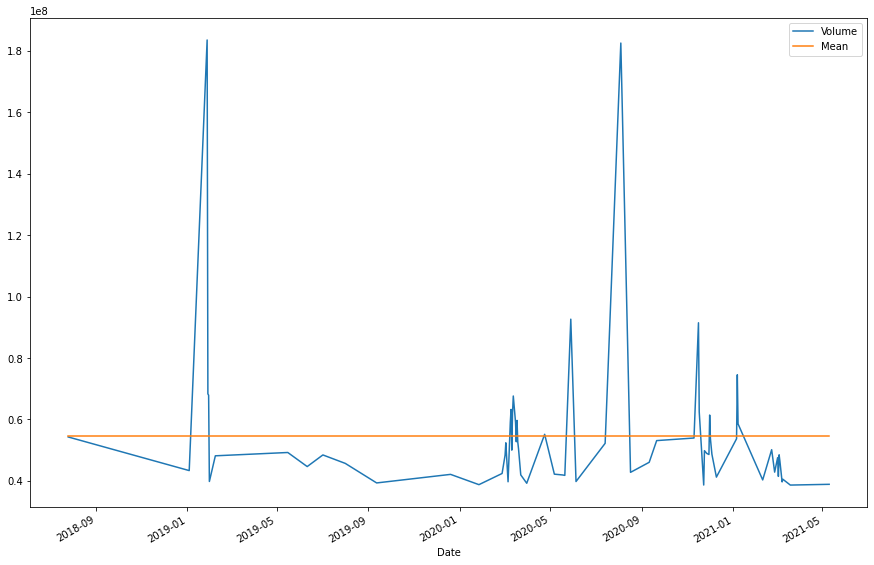

In [14]:
volume_outlier_moments['Mean'] = volume_outlier_moments['Volume'].mean()
volume_outlier_moments[['Volume','Mean']].plot(figsize=(15,10))
plt.show()

In [15]:
relevantest_moments = volume_outlier_moments.loc[volume_outlier_moments['Volume']>volume_outlier_moments['Mean']].copy()

try:
    relevantest_moments.drop(labels='Mean', axis='columns', inplace=True)
except:
    pass

relevantest_moments

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-28,45.000000,42.360001,45.000000,42.360001,183534500.0,37.903149
2019-01-29,44.689999,42.599998,43.270000,42.740002,68335900.0,38.243172
2019-01-30,46.799999,44.980000,46.250000,46.599998,67892500.0,41.697041
2020-03-09,41.540001,37.810001,40.450001,37.830002,59037000.0,34.746731
2020-03-10,45.340000,40.799999,41.900002,44.810001,63269800.0,41.157837
2020-03-12,36.000000,32.450001,36.000000,35.349998,62222000.0,32.468853
2020-03-13,44.029999,37.000000,42.000000,42.900002,67635900.0,39.403507
2020-03-16,41.400002,36.009998,36.009998,39.040001,59078300.0,35.858112
2020-03-18,40.869999,35.700001,38.799999,38.650002,59689100.0,35.499897


#### Now we try to separate this dates with 10 days range between them for search some news in next step 

In [16]:
ini_date, end_date, moments_list,time_event = None,None, [],[]

for idx,series in relevantest_moments.iterrows():
    if ini_date == None and end_date == None: 
        ini_date = idx
        end_date = idx + timedelta(days=10)
        time_event.append(idx)
    else :
        if series.name > end_date :
            moments_list.append(time_event)
            time_event = []
            ini_date = idx
            end_date = idx + timedelta(days=10)
            time_event.append(idx)
        else:
            time_event.append(idx)
            last_series_name = idx

#### Just showing the list result

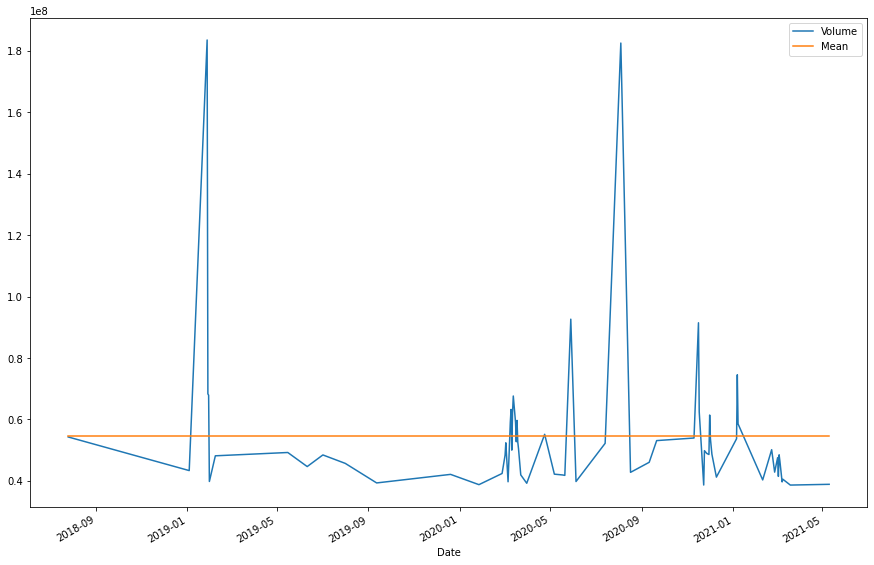

Momento 0, entre 28-01-2019 e 30-01-2019
Momento 1, entre 09-03-2020 e 18-03-2020
Momento 2, no dia 24-04-2020 
Momento 3, no dia 29-05-2020 
Momento 4, no dia 04-08-2020 
Momento 5, entre 16-11-2020 e 17-11-2020
Momento 6, no dia 01-12-2020 


In [17]:
volume_outlier_moments[['Volume','Mean']].plot(figsize=(15,10))
plt.show()
for i,m in enumerate(moments_list):
    if len(m) > 1:
        ini = m[0].strftime('%d-%m-%Y')
        end = m[len(m)-1].strftime('%d-%m-%Y')
        print('Momento {}, entre {} e {}'.format(i,ini,end))
    else:
        print('Momento {}, no dia {} '.format(i,m[0].strftime('%d-%m-%Y')))
    
    

In [299]:
# to be continue ...